# Digital Recognizer Prediction with Linear Model

In [1]:
import numpy as np
import torch
from torchvision import datasets
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt


Download the MNIST data

In [2]:
# Number of subprocesses to use for data loading
import torch.utils
import torch.utils.data


num_workers = 0

#How many samples per batch to load
batch_size = 20

#Convert the data to torch.FloatTensor
transform = transforms.ToTensor()

#Choose the training and test datasets
train_data = datasets.MNIST(root='data',
                            train=True,
                            download=True,
                            transform=transform)

test_data = datasets.MNIST(root='data',
                           train=False,
                           download=True,
                           transform=transform)

#Prepare data loaders
train_loader = torch.utils.data.DataLoader(train_data,
                                           batch_size=batch_size,
                                           num_workers=num_workers)

test_loader = torch.utils.data.DataLoader(test_data,
                                          batch_size=batch_size,
                                          num_workers=num_workers)

Visualize a Batch of Training Data

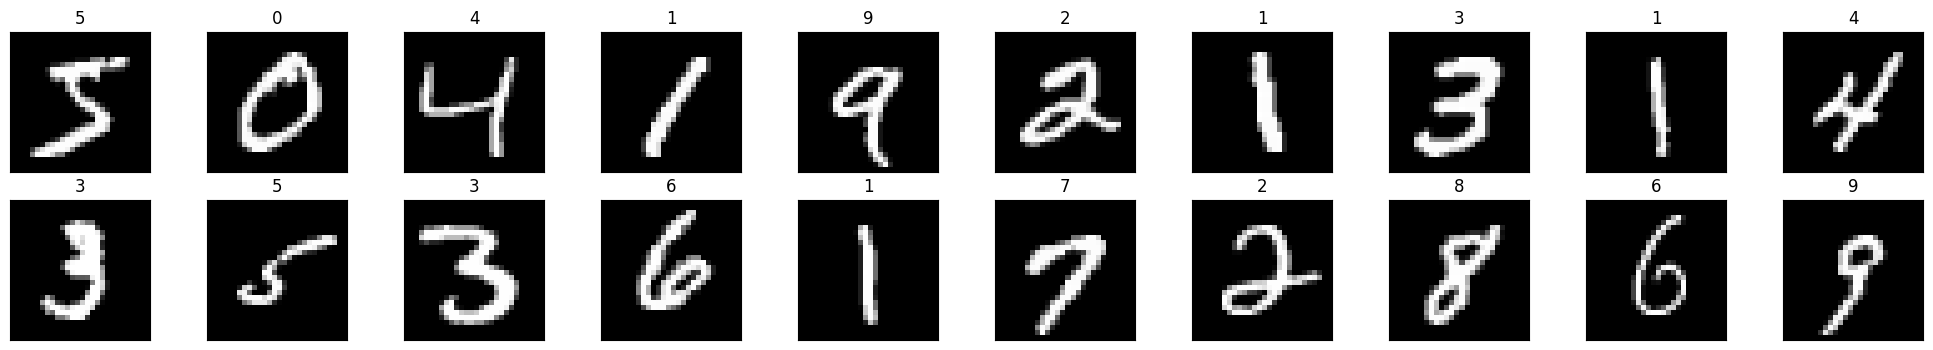

In [3]:
#Obtain one batch of training images
dataiter = iter(train_loader)
images, labels = dataiter.__next__()
images = images.numpy()

#Plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))

for idx in np.arange(20):
    ax = fig.add_subplot(2, 20//2, idx + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')

    #print out the correct label for each image
    ax.set_title(str(labels[idx].item()))

View an Image in More Detail

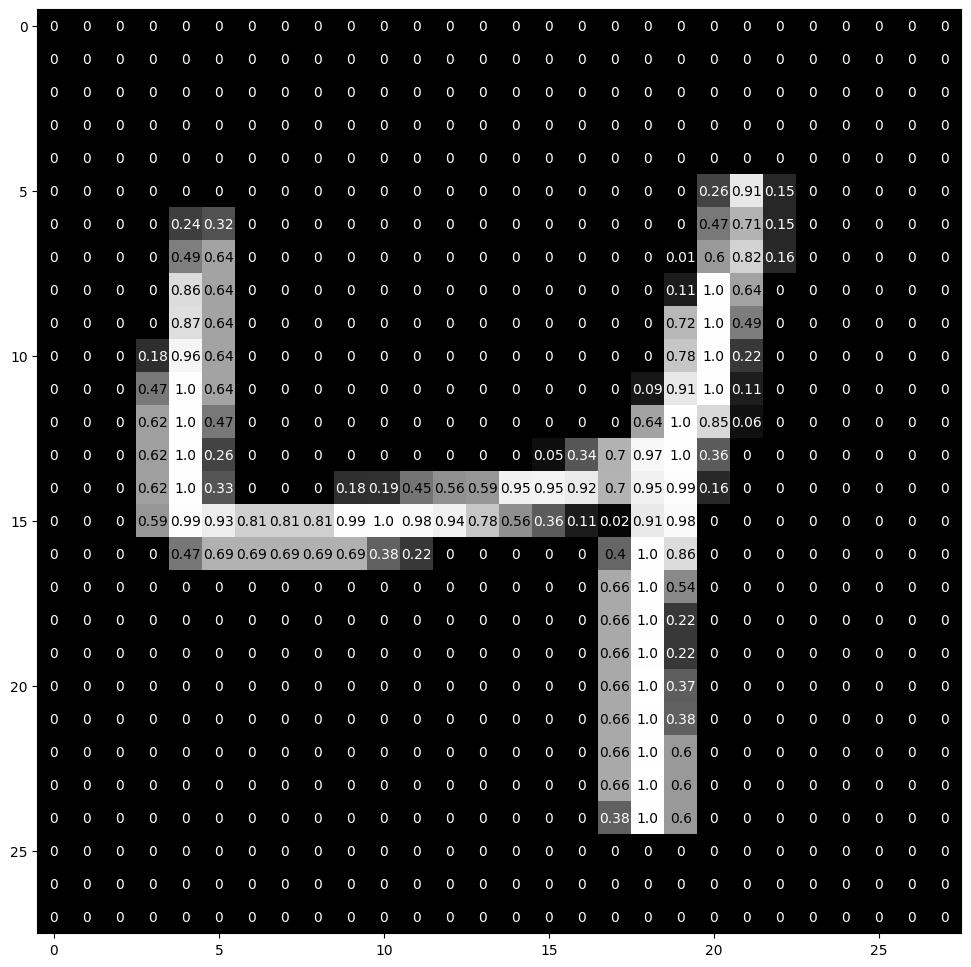

In [4]:
img = np.squeeze(images[2])

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111)
ax.imshow(img, cmap='gray')
width, height = img.shape

thresh = img.max()/2.5

for x in range(width):
    for y in range(height):
        val = round(img[x][y], 2) if img[x][y] != 0 else 0
        ax.annotate(str(val), xy=(y, x),
        horizontalalignment='center',
        verticalalignment='center',
        color='white' if img[x][y] < thresh else 'black')

Define the Network

In [5]:
# class CNN(nn.Module):
#     def __init__(self):
#         super().__init__()
#         #linear layer (784 -> 1 hidden node)
#         self.fc1 = nn.Linear(28 * 28, 1) # input=28*28, output=1

#     def forward(self, x):
#         #flatten image input
#         x = x.view(-1, 28 * 28) # No. of row -> -1 columns -> 28 * 28 [784], -1 fits all of the x values into column shape and end result will vector of 784 values
#         #add hidden layer, with relu activation function
#         x = F.relu(self.fc1(x))
#         return x.float()
    
# #Instantiate the CNN
# model = CNN()
# print(model)


Training the model
##### .The steps for training learning from a batch of data:
###### i. Clear the gradients of all optimized variables
###### ii. Forward pass: compute predicted outputs by passing inputs to the model
###### iii. Claculate the loss
###### iv. Backward pass: compute gradient of the loss with respect to model paramters
###### v. Perform a single optimization step (parameter update)
###### vi. Update average training loss 

Test the trained network

In [6]:
class Linear_Model(nn.Module):
    def __init__(self):
        super().__init__()
        # number of hidden nodes in each layer (512)
        hidden_1 = 512
        hidden_2 = 512
        self.fc1 = nn.Linear(28 * 28, hidden_1)  # linear layer (784 -> hidden_1)
        self.fc2 = nn.Linear(hidden_1, hidden_2)  # linear layer (n_hidden -> hidden_2)
        self.fc3 = nn.Linear(hidden_2, 10)  # linear layer (n_hidden -> 10)
        self.dropout = nn.Dropout(0.2)  # dropout layer (p=0.2), # dropout prevents overfitting of data

    def forward(self, x):
        x = x.view(-1, 28 * 28)  # flatten image input
        x = F.relu(self.fc1(x))  # add hidden layer, with relu activation function
        x = self.dropout(x)   # add dropout layer
        x = F.relu(self.fc2(x))  # add hidden layer, with relu activation function
        x = self.dropout(x)  # add dropout layer
        x = self.fc3(x)  # add output layer
        return x
    print(x)
    
#Instantiate CNN_Model
model = Linear_Model()
print(model)

27
Linear_Model(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=10, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)



Train the Network

In [7]:
# specify loss function (categorical cross-entropy)
criterion = nn.CrossEntropyLoss()

# specify optimizer (stochastic gradient descent) and learning rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

In [8]:
# number of epochs to train the model
n_epochs = 50

model.train()  # prep model for training

for epoch in range(n_epochs):
    # monitor training loss
    train_loss = 0.0
    
    ###################
    # train the model #
    ###################
    for data, target in train_loader:
        # clear the gradients of all optimized variables
        optimizer.zero_grad()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # backward pass: compute gradient of the loss with respect to model param
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
        # update running training loss
        train_loss = loss.item()*data.size(0)

    # print training statistics 
    # calculate average loss over an epoch
    train_loss = train_loss / len(train_loader.dataset)
    print('Epoch: {}\tTraining Loss: {:.3f}'.format(epoch+1, train_loss))

Epoch: 1	Training Loss: 0.000
Epoch: 2	Training Loss: 0.000
Epoch: 3	Training Loss: 0.000
Epoch: 4	Training Loss: 0.000
Epoch: 5	Training Loss: 0.000
Epoch: 6	Training Loss: 0.000
Epoch: 7	Training Loss: 0.000
Epoch: 8	Training Loss: 0.000
Epoch: 9	Training Loss: 0.000
Epoch: 10	Training Loss: 0.000
Epoch: 11	Training Loss: 0.000
Epoch: 12	Training Loss: 0.000
Epoch: 13	Training Loss: 0.000
Epoch: 14	Training Loss: 0.000
Epoch: 15	Training Loss: 0.000
Epoch: 16	Training Loss: 0.000
Epoch: 17	Training Loss: 0.000
Epoch: 18	Training Loss: 0.000
Epoch: 19	Training Loss: 0.000
Epoch: 20	Training Loss: 0.000
Epoch: 21	Training Loss: 0.000
Epoch: 22	Training Loss: 0.000
Epoch: 23	Training Loss: 0.000
Epoch: 24	Training Loss: 0.000
Epoch: 25	Training Loss: 0.000
Epoch: 26	Training Loss: 0.000
Epoch: 27	Training Loss: 0.000
Epoch: 28	Training Loss: 0.000
Epoch: 29	Training Loss: 0.000
Epoch: 30	Training Loss: 0.000
Epoch: 31	Training Loss: 0.000
Epoch: 32	Training Loss: 0.000
Epoch: 33	Trainin

Test the Trained Network

In [9]:
# initialize lists to monitor test loss and accuracy
test_loss = 0.0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
#print(class_correct)
#print(class_total)

model.eval()  # prep model for training

for data, target in test_loader:
    # forward pass: compute predicted outputs by passing inputs to the model
    output = model(data)
    # calculate the loss
    loss = criterion(output, target)

    # update test loss
    test_loss += loss.item()*data.size(0)
    #print(test_loss)
    # convert output probabilities to predicted class
    _, pred = torch.max(output, 1)
    #print(pred)
    # compare predictions to true label
    correct = np.squeeze(pred.eq(target.data.view_as(pred)))

    # calculate test accuracy for each object class
    for i in range(batch_size):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1
    
# calculate and print avg test loss

test_loss = test_loss/len(test_loader.dataset)
print('Test Loss: {}\n'.format(test_loss))

for i in range(10):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            str(i), 100 * class_total[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])
        ))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): {}% ({})'.format(
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)
))

Test Loss: 0.07781249259173104

Test Accuracy of     0: 100% (974/980)
Test Accuracy of     1: 100% (1127/1135)
Test Accuracy of     2: 100% (1018/1032)
Test Accuracy of     3: 100% (996/1010)
Test Accuracy of     4: 100% (968/982)
Test Accuracy of     5: 100% (882/892)
Test Accuracy of     6: 100% (944/958)
Test Accuracy of     7: 100% (1010/1028)
Test Accuracy of     8: 100% (954/974)
Test Accuracy of     9: 100% (983/1009)

Test Accuracy (Overall): 98.56% (9856.0)
